In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path  = 'drive/My Drive/br-capes-colsucup-projeto-financiador-2017-2018-08-01.csv'
df = pd.read_csv(path, sep=';',encoding='latin1')
df1 = pd.read_csv("drive/My Drive/br-capes-colsucup-projeto-financiador-2018-2019-10-01 (1).csv",sep=';',encoding='latin1')

In [4]:
df2 = pd.read_csv("drive/My Drive/br-capes-colsucup-financiador-2019-2020-11-30.csv",sep=';',encoding='latin1')
df3 = pd.read_csv("drive/My Drive/ddi-br-capes-colsucup-projeto-financiador-2013a2016-2018-05-01_2016.csv",sep=';',encoding='latin1')
df4 = pd.read_csv("drive/My Drive/ddi-br-capes-colsucup-projeto-financiador-2013a2016-2018-05-01_2015.csv",sep=';',encoding='latin1')
df5 = pd.read_csv("drive/My Drive/ddi-br-capes-colsucup-projeto-financiador-2013a2016-2018-05-01_2014.csv",sep=';',encoding='latin1')
df6 = pd.read_csv("drive/My Drive/ddi-br-capes-colsucup-projeto-financiador-2013a2016-2018-05-01_2013.csv",sep=';',encoding='latin1' )


In [ ]:
#concat das bases de financiadores

In [5]:
df_f = pd.concat([df,df1,df2, df3,df4,df5,df6], axis = 0)

In [6]:
df_f.head(
)

,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,SG_PROGRAMA_FOMENTO,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
0,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988.0,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,CONS NAC DE DESENVOLVIMENTO CIENTIFICO E TECNO...,GD,BOLSA DE DOUTORADO NO PAÍS GD,NÃO,BRASIL
1,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988.0,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,DS,PROGRAMA DE DEMANDA SOCIAL,NÃO,BRASIL
2,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988.0,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,PNPD/CAPES,PROGRAMA NACIONAL DE PÓS-DOUTORADO/CAPES,NÃO,BRASIL
3,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988.0,USP,UNIVERSIDADE DE SÃO PAULO,OUTRO AUXÍLIO FINANCEIRO,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,PROAP,APOIO À PÓS-GRADUAÇÃO,NÃO,BRASIL
4,2017,64913,127807,4856161,237993,53001010084P2,CIÊNCIAS DE MATERIAIS,2011.0,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,FAPDF5/13,FAPDF 05/2013 - PRIMEIROS PROJETOS,NÃO,BRASIL


In [7]:
#Insights


In [34]:
df_f.isnull().sum().sort_values(ascending = False)

NM_PAIS_FINANCIADOR           540010
IN_FINANCIADOR_ESTRANGEIRO    540010
SG_PROGRAMA_FOMENTO              921
NM_PROGRAMA_FOMENTO              834
AN_INICIO_PROGRAMA               113
NM_FINANCIADOR                     0
NM_NATUREZA_FINANCIAMENTO          0
NM_ENTIDADE_ENSINO                 0
SG_ENTIDADE_ENSINO                 0
NM_PROGRAMA_IES                    0
CD_PROGRAMA_IES                    0
ID_PROJETO                         0
ID_ADD_CONTEXTO                    0
ID_ADD_FOTO_PROGRAMA_IES           0
ID_ADD_FOTO_PROGRAMA               0
AN_BASE                            0
dtype: int64

In [33]:
#agrupando por quantidade de finanaciadores

In [12]:
df_f.groupby('CD_PROGRAMA_IES').count()['NM_PROGRAMA_IES'].sort_values(ascending = False)

CD_PROGRAMA_IES
42001013039P2    4265
33002010050P7    3476
31003010024P0    3408
42001013016P2    2738
32006012002P5    2500
                 ... 
33107017009P6       1
53005015002P8       1
40004015070P0       1
31066011001P7       1
23004010008P5       1
Name: NM_PROGRAMA_IES, Length: 4423, dtype: int64

In [35]:
#verificando se concatenou todos os anos

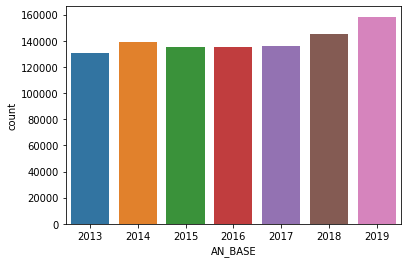

In [13]:
sns.countplot(x='AN_BASE', data = df_f)

In [36]:
#verificando se o Cd do programa se repete

In [14]:
df2.query("CD_PROGRAMA_IES in ('53001010084P2')").head(10)

,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,SG_PROGRAMA_FOMENTO,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
22603,2019,94071,159182,5877771,435906,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,CONS NAC DE DESENVOLVIMENTO CIENTIFICO E TECNO...,UNI2016B,EDITAL UNIVERSAL MCTI/CNPQ Nº 01/2016 FAIXA B,NÃO,BRASIL
22604,2019,94071,159182,5877782,398897,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,ED03/2016,EDITAL 03/2016 - DEMANDA ESPONTÂNEA - FAIXA C,NÃO,BRASIL
22605,2019,94071,159182,5877775,559921,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,FAP05/2014,EDITAL FAPDF 05/2014 - PROGRAMA DE APOIO A PRI...,NÃO,BRASIL
22606,2019,94071,159182,5877769,398651,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,PRONEX2016,EDITAL FAPDF 07/2016 PROGRAMA DE APOIO A NÚCLE...,NÃO,BRASIL
22607,2019,94071,159182,5877785,495482,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,04/2017,EDITAL 04/2017 - SELEÇÃO PÚBLICA DE PROPOSTAS ...,NÃO,BRASIL
22608,2019,94071,159182,5877781,439966,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,04/2017,EDITAL 04/2017 - SELEÇÃO PÚBLICA DE PROPOSTAS ...,NÃO,BRASIL
22942,2019,94071,159182,5877779,559879,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,04/2017,EDITAL 04/2017 - SELEÇÃO PÚBLICA DE PROPOSTAS ...,NÃO,BRASIL
22943,2019,94071,159182,5877778,559913,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,04/2017,EDITAL 04/2017 - SELEÇÃO PÚBLICA DE PROPOSTAS ...,NÃO,BRASIL
22944,2019,94071,159182,5877777,559923,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,04/2017,EDITAL 04/2017 - SELEÇÃO PÚBLICA DE PROPOSTAS ...,NÃO,BRASIL
22945,2019,94071,159182,5877776,559917,53001010084P2,CIÊNCIAS DE MATERIAIS,2011,UNB,UNIVERSIDADE DE BRASÍLIA,OUTRO AUXÍLIO FINANCEIRO,FUNDACAO DE APOIO A PESQUISA DO DISTRITO FEDER...,04/2017,EDITAL 04/2017 - SELEÇÃO PÚBLICA DE PROPOSTAS ...,NÃO,BRASIL


In [ ]:
#gerando a principal feature da base

In [15]:
a = df_f.groupby(['CD_PROGRAMA_IES', 'AN_BASE']).count()['NM_ENTIDADE_ENSINO'].sort_values(ascending=False).reset_index()

In [16]:
a = a.rename(columns={'NM_ENTIDADE_ENSINO': 'Qtd_Financiadores'})

In [17]:
a.head(15)

,CD_PROGRAMA_IES,AN_BASE,Qtd_Financiadores
0,42001013039P2,2016,742
1,42001013039P2,2017,733
2,33002010050P7,2013,687
3,33002010050P7,2014,683
4,42001013039P2,2018,659
5,42001013039P2,2015,615
6,42001013039P2,2019,590
7,42001013039P2,2014,529
8,31003010024P0,2019,528
9,31003010024P0,2018,521


In [37]:
#Análise da coluna NM_NATUREZA_FINANCIAMENTO

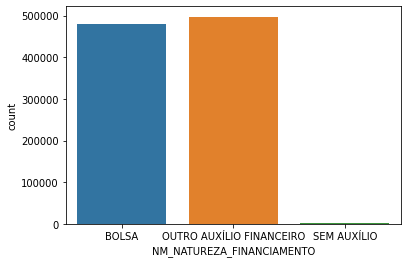

In [18]:
sns.countplot(x= 'NM_NATUREZA_FINANCIAMENTO', data= df_f)

In [38]:
#gerando Features com essa coluna

In [20]:
B = df_f.query("NM_NATUREZA_FINANCIAMENTO in ('BOLSA')")
B.head()


,AN_BASE,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_CONTEXTO,ID_PROJETO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,AN_INICIO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,NM_NATUREZA_FINANCIAMENTO,NM_FINANCIADOR,SG_PROGRAMA_FOMENTO,NM_PROGRAMA_FOMENTO,IN_FINANCIADOR_ESTRANGEIRO,NM_PAIS_FINANCIADOR
0,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988.0,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,CONS NAC DE DESENVOLVIMENTO CIENTIFICO E TECNO...,GD,BOLSA DE DOUTORADO NO PAÍS GD,NÃO,BRASIL
1,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988.0,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,DS,PROGRAMA DE DEMANDA SOCIAL,NÃO,BRASIL
2,2017,64904,127798,4854940,165855,33002010146P4,ODONTOLOGIA(BIOMATERIAIS E BIOLOGIA ORAL),1988.0,USP,UNIVERSIDADE DE SÃO PAULO,BOLSA,FUND COORD DE APERFEICOAMENTO DE PESSOAL DE NI...,PNPD/CAPES,PROGRAMA NACIONAL DE PÓS-DOUTORADO/CAPES,NÃO,BRASIL
17,2017,64937,127831,4856822,442116,15001016022P6,ZOOLOGIA,1996.0,UFPA,UNIVERSIDADE FEDERAL DO PARÁ,BOLSA,CONS NAC DE DESENVOLVIMENTO CIENTIFICO E TECNO...,GM E GD,BOLSA DE MESTRADO GM E DOUTORADO GD,NÃO,BRASIL
21,2017,64937,127831,4856959,416268,15001016022P6,ZOOLOGIA,1996.0,UFPA,UNIVERSIDADE FEDERAL DO PARÁ,BOLSA,FUNDACAO DE AMPARO A PESQUISA DO ESTADO DO PARA,PRONEX/CNP,PROGRAMA DE APOIO,NÃO,BRASIL


In [21]:
B = B.groupby(['CD_PROGRAMA_IES', 'AN_BASE']).count()['NM_ENTIDADE_ENSINO'].sort_values(ascending=False).reset_index()
B = B.rename(columns={'NM_ENTIDADE_ENSINO': 'BOLSA'})
B.head()

,CD_PROGRAMA_IES,AN_BASE,BOLSA
0,31003010024P0,2019,446
1,31003010024P0,2018,439
2,31003010024P0,2017,438
3,33002010050P7,2013,437
4,33002010050P7,2014,434


In [22]:
C = df_f.query("NM_NATUREZA_FINANCIAMENTO in ('OUTRO AUXÍLIO FINANCEIRO')")
C = C.groupby(['CD_PROGRAMA_IES', 'AN_BASE']).count()['NM_ENTIDADE_ENSINO'].sort_values(ascending=False).reset_index()
C = C.rename(columns={'NM_ENTIDADE_ENSINO': 'OUTRO AUXÍLIO FINANCEIRO'})

In [23]:
D = df_f.query("NM_NATUREZA_FINANCIAMENTO in ('SEM AUXÍLIO')").reset_index()
D = D.groupby(['CD_PROGRAMA_IES','AN_BASE']).count()['NM_ENTIDADE_ENSINO'].sort_values(ascending=False).reset_index()
D = D.rename(columns={'NM_ENTIDADE_ENSINO': 'SEM AUXÍLIO'})

In [24]:
e = pd.merge(a, B,  how='inner',  on = ['CD_PROGRAMA_IES', 'AN_BASE'])
e = pd.merge(e, C,  how='inner',  on = ['CD_PROGRAMA_IES', 'AN_BASE'])
e = pd.merge(e, D,  how='inner',  on = ['CD_PROGRAMA_IES', 'AN_BASE'])

In [25]:
e.head()

,CD_PROGRAMA_IES,AN_BASE,Qtd_Financiadores,BOLSA,OUTRO AUXÍLIO FINANCEIRO,SEM AUXÍLIO
0,32004010004P9,2016,380,278,101,1
1,32004010004P9,2014,350,256,92,2
2,32004010004P9,2015,338,249,88,1
3,32004010004P9,2013,332,245,85,2
4,31001017016P1,2015,240,105,134,1


In [39]:
#utilizando a base de ppg para a utilização da coluna de conceitos

In [26]:
path_ppg_2013 = ('drive/My Drive/br-capes-colsucup-prog-2013a2016-2020-06-12_2013.csv')
path_ppg_2014 = ('drive/My Drive/br-capes-colsucup-prog-2013a2016-2020-06-12_2014.csv')
path_ppg_2015 = ('drive/My Drive/br-capes-colsucup-prog-2013a2016-2020-06-12_2015.csv')
path_ppg_2016 = ('drive/My Drive/br-capes-colsucup-prog-2013a2016-2020-06-12_2016.csv')
path_ppg_2017 = ('drive/My Drive/br-capes-colsucup-prog-2017-2020-06-12.csv')
path_ppg_2018 = ('drive/My Drive/br-capes-colsucup-prog-2018-2020-06-12.csv')
 
df_ppg_2013 = pd.read_csv(path_ppg_2013, sep = ';', encoding = 'latin1')
df_ppg_2014 = pd.read_csv(path_ppg_2014, sep = ';', encoding = 'latin1')
df_ppg_2015 = pd.read_csv(path_ppg_2015, sep = ';', encoding = 'latin1')
df_ppg_2016 = pd.read_csv(path_ppg_2016, sep = ';', encoding = 'latin1')
df_ppg_2017 = pd.read_csv(path_ppg_2017, sep = ';', encoding = 'latin1')
df_ppg_2018 = pd.read_csv(path_ppg_2018, sep = ';', encoding = 'latin1')
 
ppg_final = pd.concat([df_ppg_2013, df_ppg_2014, df_ppg_2015, df_ppg_2016, df_ppg_2017, df_ppg_2018], axis = 0)

In [27]:
f = ppg_final.drop(columns = ['NM_GRANDE_AREA_CONHECIMENTO', 'NM_AREA_CONHECIMENTO', 'NM_SUBAREA_CONHECIMENTO', 'NM_ESPECIALIDADE', 'CD_AREA_AVALIACAO', 'NM_AREA_AVALIACAO', 'CD_ENTIDADE_CAPES', 'CD_ENTIDADE_EMEC', 'SG_ENTIDADE_ENSINO', 'CS_STATUS_JURIDICO', 'DS_DEPENDENCIA_ADMINISTRATIVA', 'NM_REGIAO', 'DS_ORGANIZACAO_ACADEMICA', 'NM_ENTIDADE_ENSINO',  'NM_MUNICIPIO_PROGRAMA_IES', 'NM_MODALIDADE_PROGRAMA', 'ID_ADD_FOTO_PROGRAMA_IES', 'ID_ADD_FOTO_PROGRAMA', 'NM_PROGRAMA_IES', 'NM_PROGRAMA_IDIOMA', 'SG_UF_PROGRAMA', 'NM_GRAU_PROGRAMA', 'ANO_INICIO_PROGRAMA', 'AN_INICIO_CURSO', 'IN_REDE', 'SG_ENTIDADE_ENSINO_REDE', 'DS_SITUACAO_PROGRAMA', 'DT_SITUACAO_PROGRAMA', 'DS_CLIENTELA_QUADRIENAL_2017', 'NM_AREA_BASICA', 'AN_INICIO_PROGRAMA'])

In [28]:
f.head()

,AN_BASE,CD_PROGRAMA_IES,CD_CONCEITO_PROGRAMA
0,2013,10001018002P1,3
1,2013,10001018004P4,4
2,2013,10001018005P0,4
3,2013,10001018006P7,4
4,2013,10001018008P0,2


In [29]:
e = pd.merge(e, f,  how='inner',  on = ['CD_PROGRAMA_IES', 'AN_BASE'])

In [30]:
e.head()

,CD_PROGRAMA_IES,AN_BASE,Qtd_Financiadores,BOLSA,OUTRO AUXÍLIO FINANCEIRO,SEM AUXÍLIO,CD_CONCEITO_PROGRAMA
0,32004010004P9,2016,380,278,101,1,5
1,32004010004P9,2014,350,256,92,2,5
2,32004010004P9,2015,338,249,88,1,5
3,32004010004P9,2013,332,245,85,2,5
4,31001017016P1,2015,240,105,134,1,6


In [31]:
e = e[['CD_PROGRAMA_IES','AN_BASE','CD_CONCEITO_PROGRAMA', 'Qtd_Financiadores','BOLSA','OUTRO AUXÍLIO FINANCEIRO','SEM AUXÍLIO']]

In [40]:
#feature gerado

In [32]:
e.head()

,CD_PROGRAMA_IES,AN_BASE,CD_CONCEITO_PROGRAMA,Qtd_Financiadores,BOLSA,OUTRO AUXÍLIO FINANCEIRO,SEM AUXÍLIO
0,32004010004P9,2016,5,380,278,101,1
1,32004010004P9,2014,5,350,256,92,2
2,32004010004P9,2015,5,338,249,88,1
3,32004010004P9,2013,5,332,245,85,2
4,31001017016P1,2015,6,240,105,134,1
